# Image Cropping 

In [2]:
#importing necessary modules
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

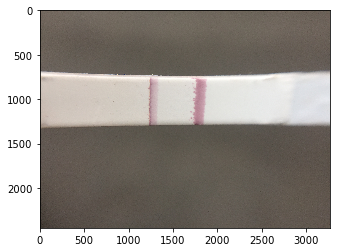

In [3]:
#reading a single image
img = cv2.imread("C:/Users/HP\Downloads/raman/data/10_Original_Sample/IMG_3060.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#converting the image to rgb
plt.imshow(img)
plt.show()

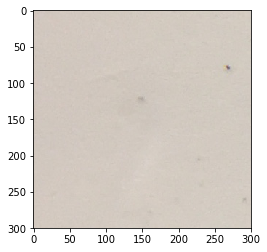

In [7]:
#cropping the white part
white = img[900:1200,500:800]
plt.imshow(white)
plt.show()

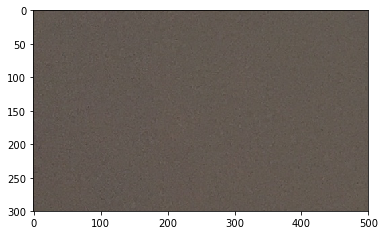

In [8]:
#cropping the black part
black = img[1500:1800,0:500]
plt.imshow(black)
plt.show()

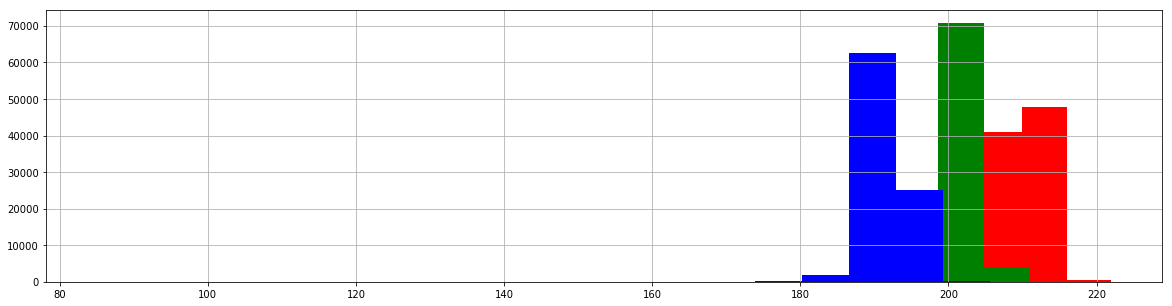

In [9]:
r_white,g_white,b_white = cv2.split(white)
#Lets plot a histogram to get a better idea.
fig,axes = plt.subplots(1,1,figsize=(20,5))
pd.DataFrame(r_white.reshape((np.size(r_white),1)))[0].hist(bins=20,color='r')
pd.DataFrame(g_white.reshape((np.size(g_white),1)))[0].hist(bins=20,color='g')
pd.DataFrame(b_white.reshape((np.size(b_white),1)))[0].hist(bins=20,color='b')

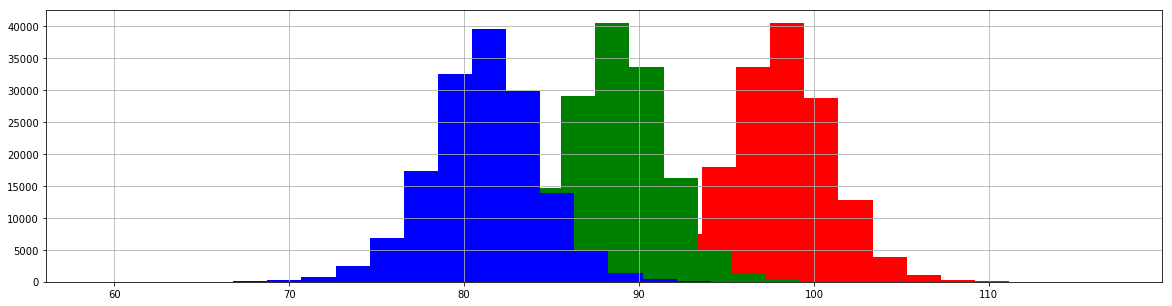

In [10]:
r_black,g_black,b_black = cv2.split(black)
#Lets plot a histogram to get a better idea.
fig,axes = plt.subplots(1,1,figsize=(20,5))
pd.DataFrame(r_black.reshape((np.size(r_black),1)))[0].hist(bins=20,color='r')
pd.DataFrame(g_black.reshape((np.size(g_black),1)))[0].hist(bins=20,color='g')
pd.DataFrame(b_black.reshape((np.size(b_black),1)))[0].hist(bins=20,color='b')

In [11]:
s1 = pd.DataFrame(r_white.reshape((np.size(r_white),1)))
s2 = pd.DataFrame(g_white.reshape((np.size(g_white),1)))
s3 = pd.DataFrame(b_white.reshape((np.size(b_white),1)))
new = pd.concat([s1, s2,s3], axis=1)
new.columns=['r_white','g_white','b_white']
new.describe()

,r_white,g_white,b_white
count,90000.000000,90000.000000,90000.000000
mean,209.558944,200.553678,191.230744
std,2.579449,2.747084,2.663173
min,101.000000,87.000000,85.000000
25%,208.000000,199.000000,190.000000
50%,210.000000,201.000000,191.000000
75%,211.000000,202.000000,193.000000
max,222.000000,211.000000,212.000000


In [12]:
s1 = pd.DataFrame(r_black.reshape((np.size(r_black),1)))
s2 = pd.DataFrame(g_black.reshape((np.size(g_black),1)))
s3 = pd.DataFrame(b_black.reshape((np.size(b_black),1)))
new = pd.concat([s1, s2,s3], axis=1)
new.columns=['r_black','g_black','b_black']
new.describe()

,r_black,g_black,b_black
count,150000.000000,150000.000000,150000.000000
mean,97.998480,88.488427,81.184107
std,3.194082,3.181855,3.224200
min,78.000000,68.000000,59.000000
25%,96.000000,87.000000,79.000000
50%,98.000000,89.000000,81.000000
75%,100.000000,91.000000,83.000000
max,117.000000,107.000000,98.000000


In [13]:
#Splitting the red,green and blue pixel values
r,g,b = cv2.split(img)

In [21]:
#creating a dataframe for red intensity values
final = pd.DataFrame(r)

In [15]:
#function which returns the location(row,column) where the first pixel value in the image is greater than or equal to 
#the intensity value given when searched from the top(column is fixed)
def f_top(sample,intensity,col):
    for row in range(len(sample.index)):
        if sample.ix[row,col]>=intensity:
                return (row,col)                

In [16]:
#function which returns the location(row,column) where the first pixel value in the image is greater than or equal to 
#the intensity value given when searched from below(column is kept fixed)
def f_below(sample,intensity,col):
    for row in range(len(sample.index)-1,-1,-1):
        if sample.ix[row,col]>=intensity:
                return (row,col)                

In [17]:
#function which returns the maximum row value out of all the row values using the above function when searched form top 
def top(final,intensity):
    top = []
    for i in range(len(final.columns)):
        top.append(f_top(final,intensity,i)[0])
    return max(top)

In [22]:
#function which returns the mainimum row value out of all the row values using the above function when searched form below
def below(final,intensity):
    below = []
    for i in range(len(final.columns)):
        below.append(f_below(final,intensity,i)[0])
    return min(below)

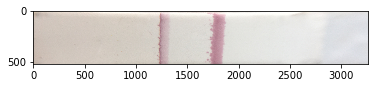

In [19]:
#cropping the required part
crop = img[top(final,150):below(final,150),:]
plt.imshow(crop)
plt.show()

In [23]:
#Similarly it can be used for other images also,the result will be same.

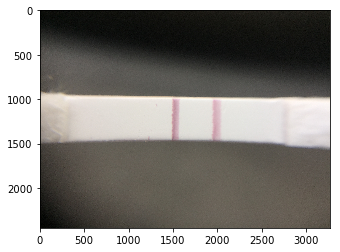

In [26]:
#reading a random single image from 10^-1 folder
img = cv2.imread("C:/Users/HP\Downloads/raman/data/10^-1/IMG_3093.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#converting the image to rgb
plt.imshow(img)
plt.show()

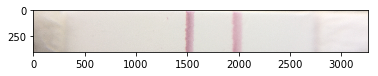

In [27]:
r,g,b = cv2.split(img)
final = pd.DataFrame(r)
#cropping the required part
crop = img[top(final,150):below(final,150),:]
plt.imshow(crop)
plt.show()

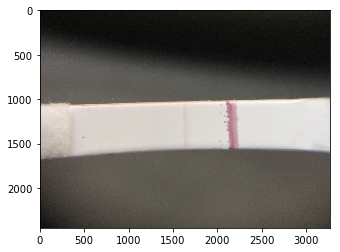

In [28]:
#reading a random single image from 10^-4 folder
img = cv2.imread("C:/Users/HP\Downloads/raman/data/10^-4/IMG_3117.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#converting the image to rgb
plt.imshow(img)
plt.show()

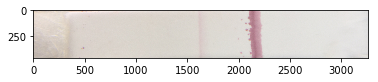

In [29]:
r,g,b = cv2.split(img)
final = pd.DataFrame(r)
#cropping the required part
crop = img[top(final,150):below(final,150),:]
plt.imshow(crop)
plt.show()

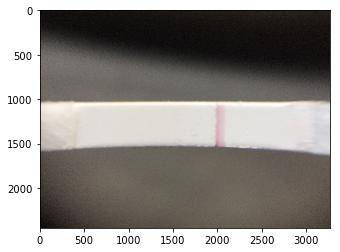

In [31]:
#reading a random single image from 10^-10 folder
img = cv2.imread("C:/Users/HP\Downloads/raman/data/10^-10/IMG_3144.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#converting the image to rgb
plt.imshow(img)
plt.show()

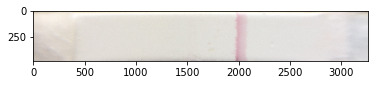

In [33]:
r,g,b = cv2.split(img)
final = pd.DataFrame(r)
#cropping the required part
crop = img[top(final,150):below(final,150),:]
plt.imshow(crop)
plt.show()